In [1]:
import torch
import numpy as np
import gpytorch
from gpytorch.kernels import RBFKernel
from ntwrk.bayesopt import BayesOpt, MPI
import matplotlib.pyplot as plt

In [2]:
torch.random.manual_seed(92)

In [3]:
def true_func(xx):
    return torch.sin(xx * 4) + torch.sin(xx * 8)

In [4]:
xx = torch.linspace(0, 1)

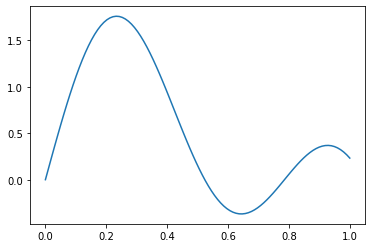

In [5]:
plt.plot(xx, true_func(xx).detach())
plt.show()

In [6]:
x = torch.rand(2)
y = true_func(x)

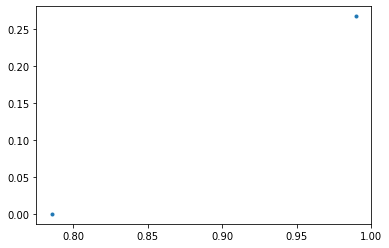

In [7]:
plt.plot(x, y, linestyle="None", marker=".")
plt.show()

In [8]:
bo = BayesOpt(x, y, max_delta=2., acquisition=MPI)

In [9]:
bo.train_surrogate(iters=200)

In [10]:
bo.surrogate_lh.eval();
bo.surrogate.eval();

test_points = torch.linspace(0, 1., 1000).float()
test_dist = bo.surrogate_lh(bo.surrogate(test_points))

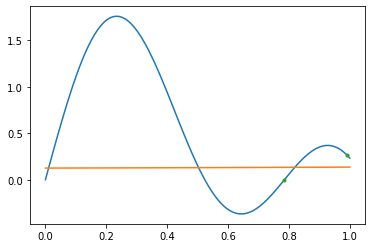

In [11]:
plt.plot(xx, true_func(xx).detach())
plt.plot(test_points, test_dist.mean.detach())
plt.plot(x, y.detach(), marker='.', linestyle="None")
plt.show()


In [16]:
bo.acquire()

tensor(0.0452)

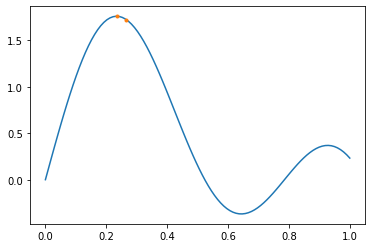

tensor([0.2462])


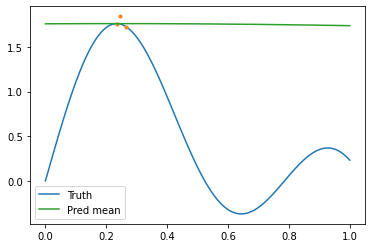

tensor([-0.9598])


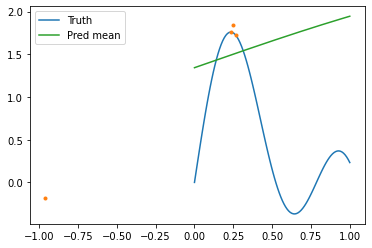

tensor([0.7487])


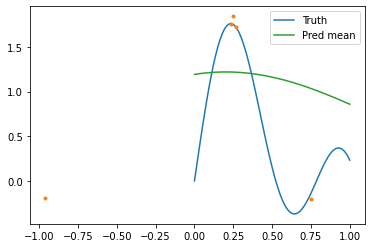

tensor([0.2060])


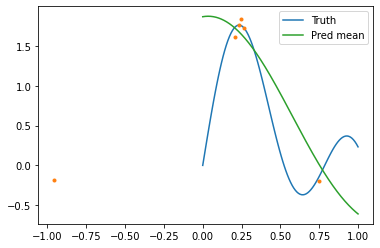

tensor([0.3367])


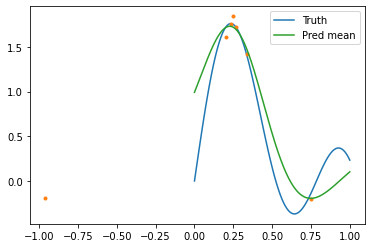

tensor([0.3668])


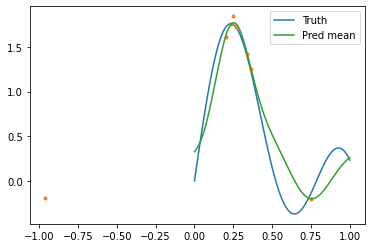

tensor([0.3970])


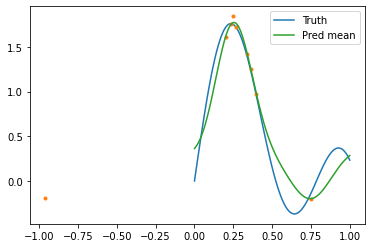

tensor([0.4171])


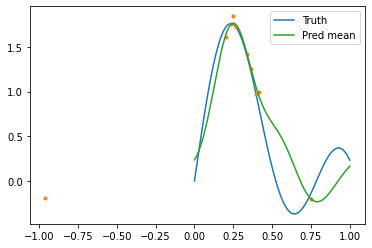

tensor([0.4271])


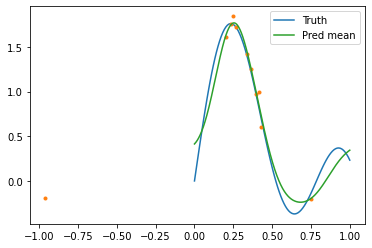

tensor([0.3970])


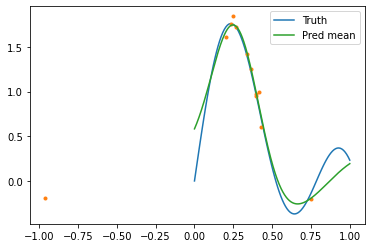

tensor([0.4070])


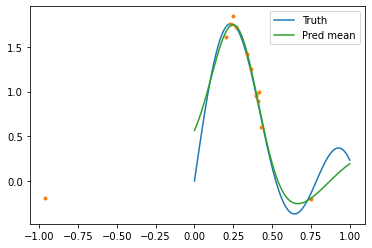

tensor([0.4070])


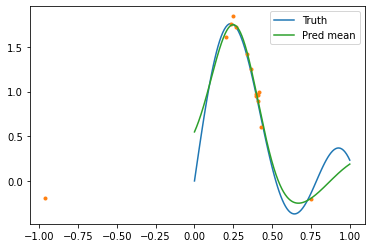

tensor([0.4070])


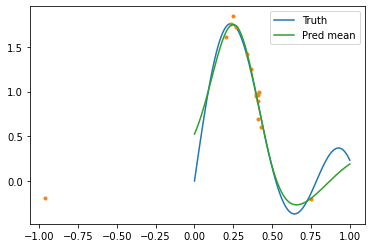

tensor([0.3970])


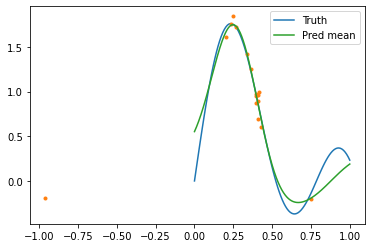

tensor([0.3970])


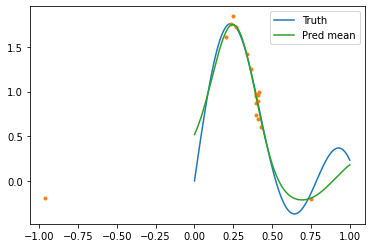

tensor([0.3869])


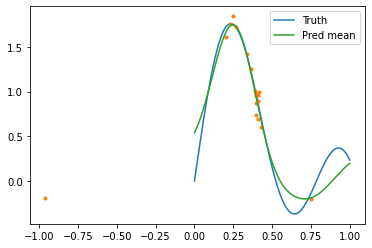

tensor([0.3869])


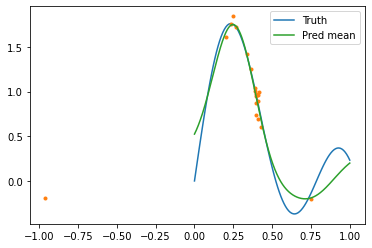

tensor([0.3970])


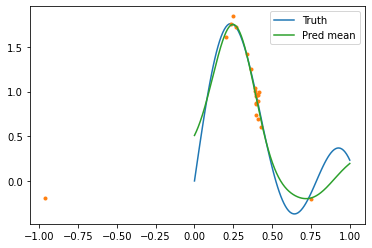

tensor([0.3970])


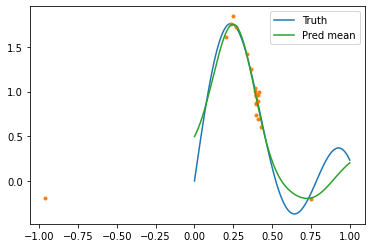

tensor([0.3970])


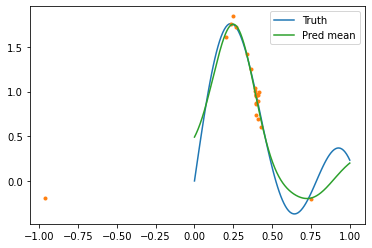

In [17]:
rate = torch.rand(2)
rwrd = true_func(rate)
bo = BayesOpt(rate, rwrd, max_delta=1., acquisition=MPI)

plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()

rnds = 20

for ii in range(rnds):
    bo.train_surrogate(iters=200)
    next_rate = bo.acquire().unsqueeze(0)
    rwrd = true_func(next_rate) + torch.randn(1)*0.1
    print(next_rate)
    bo.update_obs(next_rate, rwrd)
    
    bo.surrogate_lh.eval();
    bo.surrogate.eval();

    test_points = torch.linspace(0, 1., 1000).float()
    test_dist = bo.surrogate_lh(bo.surrogate(test_points))
    
    plt.plot(xx, true_func(xx).detach(), label="Truth")
    plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
    plt.plot(test_points, test_dist.mean.detach(), label="Pred mean")
    plt.legend()
    plt.show()

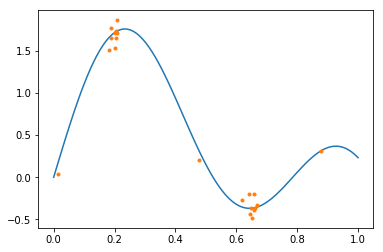

In [14]:
plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()